# 线性回归验证实验

In [4]:
# 线性回归模型的应用
from sklearn import linear_model
import numpy as np
regression=linear_model.LinearRegression() # 创建线性回归模型
X=[[3],[8]] # 观察值的X坐标，是一个二维的数组
y=[1,2] # 观察值的y坐标，是一个一维数组
regression.fit(X,y) # 拟合

LinearRegression()

In [5]:
regression.intercept_  # 截距

0.40000000000000013

In [6]:
regression.coef_ # 斜率，回归系数
                 # 反映x对y影响的大小

array([0.2])

In [7]:
# regression.predict([[6]])
unKnown=np.random.randint(0,100,[10,1])
regression.predict(unKnown)

array([ 4.4,  7.2,  3. , 12.2, 15.8,  7.8, 16. , 15.2,  2.4,  1.4])

# 岭回归实验
* 约束项系数是10

In [8]:
from sklearn.linear_model import Ridge
import numpy as np
ridgeRegression=Ridge(alpha=10) # 创建岭回归模型，设置约束项系数为10
X=[[3],[8]]
y=[1,2]
ridgeRegression.fit(X,y) # 拟合

Ridge(alpha=10)

In [9]:
unKnown=np.random.randint(0,100,[10,1])
ridgeRegression.predict(unKnown) # 预测

array([7.        , 9.88888889, 7.77777778, 9.22222222, 7.66666667,
       8.44444444, 8.        , 9.11111111, 9.        , 9.77777778])

In [10]:
# 查看回归系数
ridgeRegression.coef_

array([0.11111111])

In [11]:
# 和截距
ridgeRegression.intercept_

0.8888888888888888

* 约束项是1

In [9]:
from sklearn.linear_model import Ridge
ridgeRegression=Ridge(alpha=1.0) 
X=[[3],[8]]
y=[1,2]
ridgeRegression.fit(X,y) # 拟合

Ridge()

In [10]:
ridgeRegression.predict([[6]]) # 预测

array([1.59259259])

In [11]:
# 查看回归系数
ridgeRegression.coef_

array([0.18518519])

In [12]:
# 和截距
ridgeRegression.intercept_

0.4814814814814816

* 约束项是1

In [13]:
from sklearn.linear_model import Ridge
ridgeRegression=Ridge(alpha=0) 
X=[[3],[8]]
y=[1,2]
ridgeRegression.fit(X,y) # 拟合

Ridge(alpha=0)

In [14]:
ridgeRegression.predict([[6]]) # 预测

array([1.6])

In [15]:
# 查看回归系数
ridgeRegression.coef_

array([0.2])

In [16]:
# 和截距
ridgeRegression.intercept_

0.40000000000000013

* 指定约束项范围

In [17]:
import numpy as np
from sklearn.linear_model import RidgeCV
X=[[3],[8]]
y=[1,2]
reg=RidgeCV(alphas=np.arange(0.001,10)) # 指定α参数的范围，不能是负数和0，每次递增为1
reg.fit(X,y) # 拟合

RidgeCV(alphas=array([1.000e-03, 1.001e+00, 2.001e+00, 3.001e+00, 4.001e+00, 5.001e+00,
       6.001e+00, 7.001e+00, 8.001e+00, 9.001e+00]))

In [18]:
reg.alpha_ # 最佳数值，拟合之后这个值才可以使用

2.001

In [19]:
reg.predict([[6]]) # 预测

array([1.58620095])

# Lasso回归算法验证实验
* 惩罚系数是3.0

In [20]:
from sklearn.linear_model import Lasso
X=[[3],[8]]
y=[1,2]

reg=Lasso(alpha=3.0) # 惩罚系数是3.0
reg.fit(X,y) # 拟合

Lasso(alpha=3.0)

In [21]:
reg.coef_ # 查看系数

array([0.])

In [22]:
reg.intercept_ # 截距

1.5

In [23]:
reg.predict([[6]])

array([1.5])

# 弹性网络算法验证实验

In [1]:
from sklearn.linear_model import ElasticNet
reg=ElasticNet(alpha=1.0,l1_ratio=0.7)
X=[[3],[8]]
y=[1,2]
reg.fit(X,y)

ElasticNet(l1_ratio=0.7)

In [2]:
reg.predict([[6]])

array([1.54198473])

In [3]:
reg.coef_

array([0.08396947])

In [4]:
reg.intercept_

1.0381679389312977

# 回归算法训练模型来预测身高

In [5]:
import copy
import numpy as np
from sklearn import linear_model

# 训练数据，每一行表示一个样本，包含的信息分别为：
# 儿童年龄,性别（0女1男）
# 父亲、母亲、祖父、祖母、外祖父、外祖母的身高
X = np.array([[1, 0, 180, 165, 175, 165, 170, 165],
              [3, 0, 180, 165, 175, 165, 173, 165],
              [4, 0, 180, 165, 175, 165, 170, 165],
              [6, 0, 180, 165, 175, 165, 170, 165],
              [8, 1, 180, 165, 175, 167, 170, 165],
              [10, 0, 180, 166, 175, 165, 170, 165],
              [11, 0, 180, 165, 175, 165, 170, 165],
              [12, 0, 180, 165, 175, 165, 170, 165],
              [13, 1, 180, 165, 175, 165, 170, 165],
              [14, 0, 180, 165, 175, 165, 170, 165],
              [17, 0, 170, 165, 175, 165, 170, 165]])

# 儿童身高，单位：cm
y = np.array([60, 90, 100, 110, 130, 140, 150, 164, 160, 163, 168])

# 创建线性回归模型
lr=linear_model.LinearRegression()
# 拟合
lr.fit(X,y)

LinearRegression()

In [6]:
# 待测的未知数据，其中每个分量的含义和训练数据相同
x = np.array([[10, 0, 180, 165, 175, 165, 170, 165],
               [17, 1, 173, 153, 175, 161, 170, 161],
               [34, 0, 170, 165, 170, 165, 170, 165]])

for item in x:
    # 为不改变原始数据，进行深复制，并假设超过18岁以后就不再长高了
    # 对于18岁以后的年龄，返回18岁时的身高
    item1 = copy.deepcopy(item)
    if item1[0] > 18:
        item1[0] = 18
    print(item, ':', lr.predict(item1.reshape(1,-1)))


[ 10   0 180 165 175 165 170 165] : [140.56153846]
[ 17   1 173 153 175 161 170 161] : [158.41]
[ 34   0 170 165 170 165 170 165] : [176.03076923]


# 逻辑回归算法预测考试是否能够及格
* 随机实验

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# 构造测试数据
X=np.array([[i] for i in range(30)])
y=np.array([0]*15+[1]*15)

# 人为修改部分样本的值
y[np.random.randint(0,15,3)] = 1
y[np.random.randint(15,30,4)] = 0
print(y[:15])
print(y[15:])

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
[1 1 1 1 1 1 0 1 1 1 1 0 0 1 1]


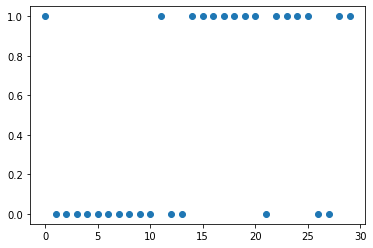

In [8]:
# 根据原始数据绘制散点图
plt.scatter(X,y)

In [9]:
# 创建并训练逻辑回归模型
reg=LogisticRegression('l2',C=3.0)
reg.fit(X,y)

LogisticRegression(C=3.0)

In [10]:
# 对未知数据进行预测
print(reg.predict([[5],[19]]))

[0 1]


In [11]:
# 未知数据属于某一种类别的概率
print(reg.predict_proba([[5],[19]]))

[[0.78130853 0.21869147]
 [0.35362437 0.64637563]]


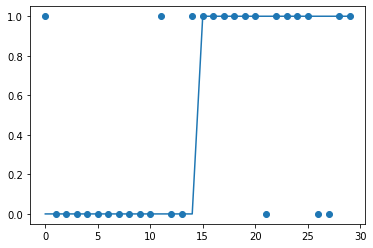

In [12]:
# 对原始观察点进行预测
yy=reg.predict(X)
# 根据原始数据绘制散点图
plt.scatter(X,y)
# 根据预测结果绘制折线图
plt.plot(X,yy)
plt.show()

* 使用逻辑回归模型算法预测考试是否能及格

In [13]:
from sklearn.linear_model import LogisticRegression

# 复习情况，格式为(时长,效率)，其中时长单位为小时
# 效率为[0,1]之间的小数，数值越大表示效率越高
X_train = [(0,0), (2,0.9), (3,0.4), (4,0.9), (5,0.4), (6,0.4), (6,0.8), (6,0.7), (7,0.2), (7.5,0.8),(7,0.9), (8,0.1), (8,0.6), (8,0.8)]
# 0表示不及格，1表示及格
y_train = [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1]

# 创建并训练逻辑回归模型
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [14]:
# 测试模型
X_test = [(3,0.9), (8,0.5), (7,0.2), (4,0.5), (4,0.7)]
y_test = [0, 1, 0, 0, 1]
score = reg.score(X_test, y_test)

# 预测并输出预测结果
learning = [(8, 0.9)]
result = reg.predict_proba(learning)
msg = '''模型得分：{0}
复习时长为：{1[0]}，效率为：{1[1]}
您不及格的概率为：{2[0]}
您及格的概率为：{2[1]}
综合判断，您会：{3}'''.format(score, learning[0], result[0], '不及格' if result[0][0]>0.5 else '及格')
print(msg)

模型得分：0.6
复习时长为：8，效率为：0.9
您不及格的概率为：0.18982398713996873
您及格的概率为：0.8101760128600313
综合判断，您会：及格


# 朴素贝叶斯算法对中文邮件进行分类
* 首先先从文件中获取文字

In [9]:
from re import sub
from os import listdir
from collections import Counter
from itertools import chain
from numpy import array
from jieba import cut
from sklearn.naive_bayes import MultinomialNB

# 获取每一封邮件中的所有词语
def getWordsFromFile(txtFile):
    words = []
    # 所有存储邮件文本内容的记事本文件都使用UTF8编码
    with open(txtFile, encoding='utf8') as fp:
        for line in fp:
            # 遍历每一行，删除两端的空白字符
            line = line.strip()
            # 过滤干扰字符或无效字符
            line = sub(r'[.【】0-9、—。，！~\*]', '', line)
            # 分词
            line = cut(line)
            # 过滤长度为1的词
            line = filter(lambda word: len(word)>1, line)
            # 把本行文本预处理得到的词语添加到words列表中
            words.extend(line)
    # 返回包含当前邮件文本中所有有效词语的列表
    return words

# 存放所有文件中的单词
# 每个元素是一个子列表，其中存放一个文件中的所有单词
allWords = []
def getTopNWords(topN):
    # 按文件编号顺序处理当前文件夹中所有记事本文件
    # 训练集中共151封邮件内容，0.txt到126.txt是垃圾邮件内容，127.txt到150.txt为正常邮件内容
    txtFiles = ['D:\\workspaces\\AI\ip\\人工智能\\数据集\\贝叶斯中文邮件分类\\'+ str(i) +'.txt' for i in range(151)]
    # 获取训练集中所有邮件中的全部单词
    for txtFile in txtFiles:
        allWords.append(getWordsFromFile(txtFile))
    # 获取并返回出现次数最多的前topN个单词
    freq = Counter(chain(*allWords))
    return [w[0] for w in freq.most_common(topN)]

# 全部训练集中出现次数最多的前600个单词
topWords = getTopNWords(600)

# 获取特征向量，前600个单词的每个单词在每个邮件中出现的频率
vectors = []
for words in allWords:
    temp = list(map(lambda x: words.count(x), topWords))
    vectors.append(temp)

vectors = array(vectors)
# 训练集中每个邮件的标签，1表示垃圾邮件，0表示正常邮件
labels = array([1]*127 + [0]*24)

# 创建模型，使用已知训练集进行训练
model = MultinomialNB()
model.fit(vectors, labels)

def predict(txtFile):
    # 获取指定邮件文件内容，返回分类结果
    words = getWordsFromFile(txtFile)
    currentVector = array(tuple(map(lambda x: words.count(x),
                                    topWords)))
    result = model.predict(currentVector.reshape(1, -1))[0]
    print(model.predict_proba(currentVector.reshape(1, -1)))
    return '垃圾邮件' if result==1 else '正常邮件'

# 151.txt至155.txt为测试邮件内容
for mail in ('D:\\workspaces\\AI\ip\\人工智能\\数据集\\贝叶斯中文邮件分类\\'+ str(i) +'.txt' for i in range(151, 156)):
    print(mail, predict(mail), sep=':')


[[0.00531716 0.99468284]]
D:\workspaces\AI\ip\人工智能\数据集\贝叶斯中文邮件分类\151.txt:垃圾邮件
[[9.86125127e-13 1.00000000e+00]]
D:\workspaces\AI\ip\人工智能\数据集\贝叶斯中文邮件分类\152.txt:垃圾邮件
[[0.1589404 0.8410596]]
D:\workspaces\AI\ip\人工智能\数据集\贝叶斯中文邮件分类\153.txt:垃圾邮件
[[3.13377251e-04 9.99686623e-01]]
D:\workspaces\AI\ip\人工智能\数据集\贝叶斯中文邮件分类\154.txt:垃圾邮件
[[0.88673294 0.11326706]]
D:\workspaces\AI\ip\人工智能\数据集\贝叶斯中文邮件分类\155.txt:正常邮件


# 决策树算法验证实验

In [18]:
import numpy as np
from sklearn import tree
# 数据
X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y=[0,1,1,1,2,3,3,4]
# 创建决策树分类器
clf=tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [19]:
# 预测
clf.predict([[1,0,0]])

array([2])

In [20]:
import graphviz
# 导出决策树
dot_data=tree.export_graphviz(clf,out_file=None)
# 创建图形
graph= graphviz.Source(dot_data) 
# 输出pdf文件
graph.render('result')

'result.pdf'

# 随机森林算法验证实验

In [24]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# 生成测试数据
X, y = make_classification(n_samples=800,     # 800个样本
        n_features=6,      # 每个样本6个特征
        n_informative=4,   # 4个有用特征
        n_redundant=2,     # 2个冗余特征
        n_classes=2,       # 全部样本分2类
        shuffle=True)
clf = RandomForestClassifier(n_estimators=4,  # 4个决策树
                             max_depth=3,     # 最多3层
                             criterion='gini', max_features=0.1, min_samples_split=5)
clf.fit(X, y)
# 包含拟合好的决策树的列表
print('决策树列表：\n', clf.estimators_)
# 类标签
print('类标签列表：\n', clf.classes_)
# 执行fit()时特征的数量
print('特征数量：\n', clf.n_features_)
# 包含每个特征重要性的列表，值越大表示该特征越重要
print('每个特征的重要性：\n', clf.feature_importances_)

x = [[1]*6]
print('预测结果：\n', clf.predict(x))

决策树列表：
 [DecisionTreeClassifier(max_depth=3, max_features=0.1, min_samples_split=5,
                       random_state=1472343649), DecisionTreeClassifier(max_depth=3, max_features=0.1, min_samples_split=5,
                       random_state=1186964593), DecisionTreeClassifier(max_depth=3, max_features=0.1, min_samples_split=5,
                       random_state=908734354), DecisionTreeClassifier(max_depth=3, max_features=0.1, min_samples_split=5,
                       random_state=170574379)]
类标签列表：
 [0 1]
特征数量：
 6
每个特征的重要性：
 [0.36057401 0.10048943 0.00662619 0.08927064 0.27175868 0.17128105]
预测结果：
 [1]


D:\Anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


* 判断学员的Python水平

In [26]:
from sklearn import tree
import numpy as np
# s数据
questions = ('《Python程序设计基础（第2版）》',
             '《Python程序设计基础与应用》',
             '《Python程序设计（第2版）》',
             '《大数据的Python基础》',
             '《Python程序设计开发宝典》',
             '《Python可以这样学》',
             '《中学生可以这样学Python》',
             '《Python编程基础与案例集锦（中学版）》',
             '《玩转Python轻松过二级》',
             '微信公众号“Python小屋”的免费资料',)
# 每个样本的数据含义：
# 0没看过，1很多看不懂，2大部分可以看懂，3没压力
answers = [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           [0, 0, 0, 0, 0, 0, 2, 2, 0, 1],
           [0, 0, 0, 0, 3, 3, 0, 0, 0, 3],
          
           [3, 3, 0, 3, 0, 0, 0, 0, 3, 1],
           [3, 0, 3, 0, 3, 0, 0, 3, 3, 2],
           [0, 0, 3, 0, 3, 3, 0, 0, 0, 3],
           [2, 2, 0, 2, 0, 0, 0, 0, 0, 1],
           [0, 2, 1, 3, 1, 1, 0, 0, 2, 1]
          ]

labels = ['超级高手', '门外汉', '初级选手', '初级选手', '高级选手',
          '中级选手', '高级选手', '超级高手', '初级选手', '初级选手']

clf = tree.DecisionTreeClassifier().fit(answers, labels) # 训练

yourAnswer = []
# 显示调查问卷，并接收用户输入
for question in questions:
    print('=========\n你看过董付国老师的', question, '吗？')
    # 确保输入有效
    while True:
        print('没看过输入0，很多看不懂输入1，'
               '大部分可以看懂输入2，没压力输入3')
        try:
            answer = int(input('请输入：'))
            assert 0<=answer<=3
            break
        except:
            print('输入无效，请重新输入。')
            pass
    yourAnswer.append(answer)
    
print(clf.predict(np.array(yourAnswer).reshape(1,-1)))   # 分类

你看过董付国老师的 《Python程序设计基础（第2版）》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：3
你看过董付国老师的 《Python程序设计基础与应用》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：3
你看过董付国老师的 《Python程序设计（第2版）》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：0
你看过董付国老师的 《大数据的Python基础》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：6
输入无效，请重新输入。
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：0
你看过董付国老师的 《Python程序设计开发宝典》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：0
你看过董付国老师的 《Python可以这样学》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：3
你看过董付国老师的 《中学生可以这样学Python》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：0
你看过董付国老师的 《Python编程基础与案例集锦（中学版）》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：3
你看过董付国老师的 《玩转Python轻松过二级》 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：2
你看过董付国老师的 微信公众号“Python小屋”的免费资料 吗？
没看过输入0，很多看不懂输入1，大部分可以看懂输入2，没压力输入3
请输入：0
['门外汉']


# 支持向量机算法对手写数字图像进行分类

In [4]:
from os import mkdir,listdir
from os.path import isdir,basename
from random import choice,randrange
from string import digits
from PIL import Image,ImageDraw
from PIL.ImageFont import truetype
from sklearn import svm
from sklearn.model_selection import train_test_split

# 图像尺寸、图片中的数字字体大小、噪点比例
width, height = 30, 60
fontSize = 40
noiseRate = 8

# 生成图片
def generateDigits(dstDir='D:\\workspaces\\AI\\ip\\人工智能\\数据集\\datasets', num=1000):
    # 生成num个包含数字的图片文件存放于datasets子目录
    if not isdir(dstDir):
        mkdir(dstDir)
        
    # digits.txt用来存储每个图片对应的数字
    with open(dstDir+'\\digits.txt', 'w') as fp:
        for i in range(num):
            # 随机选择一个数字，生成对应的彩色图像文件
            digit = choice(digits)
            im = Image.new('RGB', (width,height), (255,255,255))
            imDraw = ImageDraw.Draw(im)
            font = truetype('c:\\windows\\fonts\\TIMESBD.TTF', fontSize)
            # 写入黑色数字
            imDraw.text((0,0), digit, font=font, fill=(0,0,0))
            # 加入随机干扰
            for j in range(int(noiseRate*width*height)):
                w, h = randrange(1, width-1), randrange(height)
                # 水平交换两个相邻像素的颜色
                c1 = im.getpixel((w,h))
                c2 = im.getpixel((w+1,h))                
                imDraw.point((w,h), fill=c2)
                imDraw.point((w+1,h), fill=c1)
            im.save(dstDir+'\\'+str(i)+'.jpg')
            fp.write(digit+'\n')

# 加载图片
def loadDigits(dstDir='D:\\workspaces\\AI\\ip\\人工智能\\数据集\\datasets'):
    # 获取所有图像文件名
    digitsFile = [dstDir+'\\'+fn for fn in listdir(dstDir) if fn.endswith('.jpg')]
    # 按编号排序
    digitsFile.sort(key=lambda fn: int(basename(fn)[:-4]))
    # digitsData用于存放读取的图片中数字信息
    # 每个图片中所有像素值存放于digitsData中的一行数据
    digitsData = []
    for fn in digitsFile:
        with Image.open(fn) as im:
            # getpixel()方法用来读取指定位置像素的颜色值
            data = [sum(im.getpixel((w,h)))/len(im.getpixel((w,h)))
                    for w in range(width)
                    for h in range(height)]
            digitsData.append(data)
            
    # digitsLabel用于存放图片中数字的标准分类
    with open(dstDir+'\\digits.txt') as fp:
        digitsLabel = fp.readlines()
    # 删除数字字符两侧的空白字符
    digitsLabel = [label.strip() for label in digitsLabel]
    return (digitsData, digitsLabel)

# 生成图片文件
generateDigits(num=1000)
# 加载数据
data = loadDigits()
print('数据加载完成。')

# 随机划分训练集和测试集，其中参数test_size用来指定测试集大小
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.1)
# 创建并训练模型
svcClassifier = svm.SVC(kernel="linear", C=1000, gamma=0.001)
svcClassifier.fit(X_train, y_train)
print('模型训练完成。')

# 使用测试集对模型进行评分
score = svcClassifier.score(X_test, y_test)
print('模型测试得分：', score)



数据加载完成。
模型训练完成。
模型测试得分： 1.0


# KNN算法判断交通工具

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# X中存储交通工具的参数
# 总长度（米）、时速（km/h）、重量（吨）、座位数量
X = [[96, 85, 120, 400],        # 普通火车
      [144, 92, 200, 600],
      [240, 87, 350, 1000],
      [360, 90, 495, 1300],
      [384, 91, 530, 1405],
      [240, 360, 490, 800],      # 高铁
      [360, 380, 750, 1200],
      [290, 380, 480, 960],
      [120, 320, 160, 400],
      [384, 340, 520, 1280],
      [33.4, 918, 77, 180],      # 飞机
      [33.6, 1120, 170.5, 185],
      [39.5, 785, 230, 240],
      [33.84, 940, 150, 195],
      [44.5, 920, 275, 275],
      [75.3, 1050, 575, 490]]
# y中存储类别，0表示普通火车，1表示高铁，2表示飞机
y = [0]*5+[1]*5+[2]*6
# labels中存储对应的交通工具名称
labels = ('普通火车', '高铁', '飞机')

# 创建并训练模型
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X, y)

# 对未知样本进行分类
# unKnown = [[300, 79, 320, 900], [36.7, 800, 190, 220]]
unKnown=np.random.randint(0,1000,size=(20,4))
result = knn.predict(unKnown)
for para, index in zip(unKnown, result):
    print(para, labels[index], sep=':')


[931 487 764 741]:高铁
[ 46 194  77 975]:普通火车
[402 542 355 784]:高铁
[182 781 446 366]:飞机
[685 867 805 203]:飞机
[ 45 156 989 639]:高铁
[620 304 919 515]:高铁
[125 925 922 749]:高铁
[536 918 546 642]:飞机
[ 27 755 948 288]:飞机
[232  32 265 662]:普通火车
[975 243 921  72]:高铁
[869 941 104  96]:飞机
[827 449 849 867]:高铁
[334  49 147 106]:普通火车
[745 231 874 305]:高铁
[640 850 192 704]:高铁
[412 371 183 582]:高铁
[279 746 715 241]:飞机
[944 312 894 662]:高铁


# KMeans聚类算法压缩图像颜色

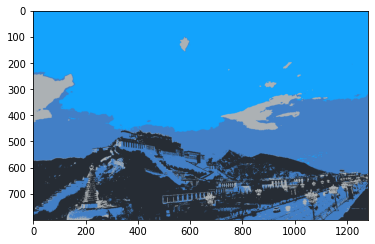

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt

# 打开并读取原始图像中像素颜色值，转换为三维数组
imOrigin = Image.open('D:\\workspaces\\AI\\ip\\人工智能\\数据集\\颜色压缩测试图像.jpg')
dataOrigin = np.array(imOrigin)
# 然后再转换为二维数组，-1表示自动计算该维度的大小
data = dataOrigin.reshape(-1,3)

# 使用KMeans算法把所有像素的颜色值划分为4类
kmeansPredicter = KMeans(n_clusters=4)
kmeansPredicter.fit(data)

# 使用每个像素所属类的中心值替换该像素的颜色
# temp中存放每个数据所属类的标签
temp = kmeansPredicter.labels_
dataNew = kmeansPredicter.cluster_centers_[temp]
dataNew.shape = dataOrigin.shape
dataNew = np.uint8(dataNew)
plt.imshow(dataNew)
plt.imsave('D:\\workspaces\\AI\\ip\\人工智能\\数据集\\结果图像.jpg', dataNew)
plt.show()

# 分层聚类算法验证实验

[[-3.11037324e+00  2.05747766e+00]
 [-4.13293090e+00 -2.01096221e+00]
 [-5.28296523e+00 -2.18633537e+00]
 [ 4.83613384e+00 -3.68420211e+00]
 [-1.72029984e+00  2.06386822e+00]
 [ 9.19674562e-01  3.83782992e+00]
 [-3.46937847e+00  2.45543869e+00]
 [-3.45443644e-01  5.26066984e+00]
 [-5.03777630e+00  1.90477775e+00]
 [-5.13770547e+00 -2.40036240e+00]
 [-5.39866035e+00 -9.48524750e-01]
 [-3.65454148e+00 -2.25846011e+00]
 [ 2.73847877e-01  6.66301117e+00]
 [-4.12594032e+00  2.86459479e+00]
 [-1.37961058e+00  2.05700871e+00]
 [-1.51131961e+00  6.16835522e+00]
 [-6.47362296e+00 -1.72717674e+00]
 [-2.77926993e+00  2.72645884e+00]
 [-2.95899298e+00 -1.07378920e+00]
 [-6.86721330e-01  6.37839997e+00]
 [-7.66736365e-01  5.41054896e+00]
 [-2.94434594e+00 -6.85196072e-01]
 [ 4.21089409e+00 -3.60183495e+00]
 [ 6.07889065e+00 -3.40165671e+00]
 [-4.82221133e+00 -1.52564850e+00]
 [-5.28310443e+00 -1.40073740e+00]
 [-3.75109629e+00 -4.02110847e-01]
 [-2.80231810e+00  1.21797510e+00]
 [-6.02625765e-01  7

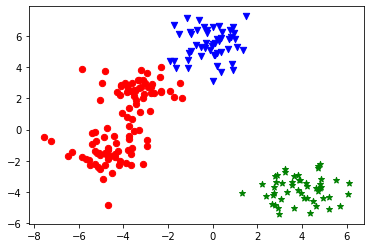

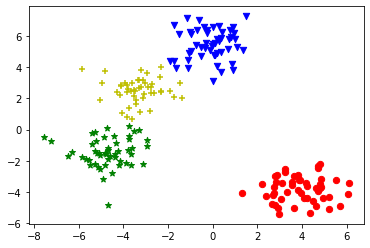

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

def AgglomerativeTest(n_clusters):
    assert 1 <= n_clusters <= 4
    predictResult = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                            linkage='ward').fit_predict(data)
    # 定义绘制散点图时使用的颜色和散点符号
    colors = 'rgby'
    markers = 'o*v+'
    # 依次使用不同的颜色和符号绘制每个类的散点图
    for i in range(n_clusters):
        subData = data[predictResult==i]
        plt.scatter(subData[:,0], subData[:,1], c=colors[i], marker=markers[i], s=40)
    plt.show()


# 生成随机数据，200个点，分成4类，返回样本及标签
data, labels = make_blobs(n_samples=200, centers=4)
print(data)
AgglomerativeTest(3)
AgglomerativeTest(4)


# DBSCAN算法验证实验

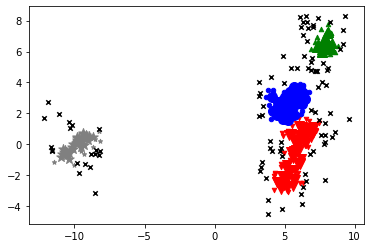

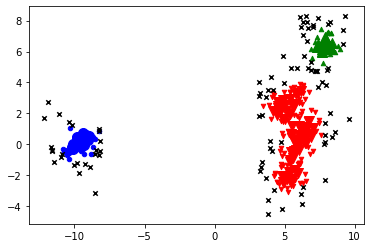

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

def DBSCANtest(data, eps=0.6, min_samples=8):
    # 聚类
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        
    # 聚类标签（数组，表示每个样本所属聚类）和所有聚类的数量
    # 标签-1对应的样本表示噪点
    clusterLabels = db.labels_
    uniqueClusterLabels = set(clusterLabels)
    # 标记核心对象对应下标为True
    coreSamplesMask = np.zeros_like(db.labels_, dtype=bool)
    coreSamplesMask[db.core_sample_indices_] = True

    # 绘制聚类结果
    colors = ['red', 'green', 'blue', 'gray', '#88ff66',
              '#ff00ff', '#ffff00', '#8888ff', 'black',]
    markers = ['v', '^', 'o', '*', 'h', 'd', 'D', '>', 'x']
    for label in uniqueClusterLabels:
        # 使用最后一种颜色和符号绘制噪声样本
        # clusterIndex是个True/False数组
        # 其中True表示对应样本为cluster类
        clusterIndex = (clusterLabels==label)
        
        # 绘制核心对象
        coreSamples = data[clusterIndex&coreSamplesMask]
        plt.scatter(coreSamples[:, 0], coreSamples[:, 1],
                    c=colors[label], marker=markers[label], s=100)

        # 绘制非核心对象
        nonCoreSamples = data[clusterIndex & ~coreSamplesMask]
        plt.scatter(nonCoreSamples[:, 0], nonCoreSamples[:, 1],
                    c=colors[label], marker=markers[label], s=20)
    plt.show()

data, labels = make_blobs(n_samples=300, centers=5)
DBSCANtest(data)
DBSCANtest(data, 0.8, 15)


# 协同过滤算法进行电影推荐

In [11]:
from random import randrange

# 模拟历史电影打分数据，共10个用户，每个用户打分的电影数量不等
data = {'user'+str(i):{'film'+str(randrange(1, 15)):randrange(1, 6) for j in range(randrange(3, 10))}
         for i in range(10)}
# 寻求推荐的用户对电影打分的数据
user = {'film'+str(randrange(1, 15)):randrange(1,6) for i in range(5)}

# 最相似的用户及其对电影打分情况
# 两个最相似的用户共同打分的电影最多，同时所有电影打分差值的平方和最小
rule = lambda item:(-len(item[1].keys()&user),
                    sum(((item[1].get(film)-user.get(film))**2 for film in user.keys()&item[1].keys())))
similarUser, films = min(data.items(), key=rule)
# 输出信息以便验证，每行数据有3列
# 分别为该用户与当前用户共同打分的电影数量、打分差的平方和、该用户打分数据
print('known data'.center(50, '='))
for item in data.items():
    print(len(item[1].keys()&user.keys()),
          sum(((item[1].get(film)-user.get(film))**2 for film in user.keys()&item[1].keys())),
          item, sep=':')
print('current user'.center(50, '='), user, sep='\n')
print('most similar user and his films'.center(50, '='))
print(similarUser, films, sep=':')
print('recommended film'.center(50, '='))
# 在当前用户没看过的电影中选择打分最高的进行推荐
print(max(films.keys()-user.keys(), key=lambda film: films[film]))


====================known data====================
2:4:('user0', {'film10': 4, 'film6': 1, 'film2': 2, 'film5': 2, 'film3': 5, 'film9': 4})
4:12:('user1', {'film6': 2, 'film2': 1, 'film9': 3, 'film4': 3, 'film7': 4, 'film3': 4})
0:0:('user2', {'film10': 1, 'film14': 5, 'film2': 4, 'film1': 1, 'film5': 3, 'film12': 2})
1:4:('user3', {'film8': 4, 'film4': 4, 'film1': 2, 'film13': 1, 'film6': 3, 'film2': 5, 'film14': 5, 'film10': 4})
1:0:('user4', {'film10': 1, 'film14': 1, 'film12': 3, 'film3': 5, 'film13': 5})
2:10:('user5', {'film11': 1, 'film6': 2, 'film1': 2, 'film9': 5, 'film7': 2, 'film12': 2, 'film13': 2, 'film8': 5})
3:18:('user6', {'film2': 1, 'film4': 2, 'film5': 2, 'film11': 2, 'film10': 2, 'film12': 5, 'film7': 4, 'film9': 5})
1:4:('user7', {'film2': 3, 'film5': 4, 'film9': 4, 'film8': 1, 'film12': 1})
0:0:('user8', {'film12': 3, 'film14': 4, 'film8': 4, 'film2': 2, 'film1': 5, 'film10': 5})
1:9:('user9', {'film6': 4, 'film5': 2, 'film10': 4, 'film13': 2, 'film7': 4, 'film2':

# 使用关联规则分析演员关系

In [2]:
from itertools import chain, combinations
from openpyxl import load_workbook

def loadDataSet():
    '''加载数据，返回包含若干集合的列表'''
    # 返回的数据格式为 [{1, 3, 4}, {2, 3, 5}, {1, 2, 3, 5}, {2, 5}]
    result = []
    # xlsx文件中有3列，分别为电影名称、导演名称、演员清单
    # 同一个电影的多个主演演员使用逗号分隔
    ws = load_workbook('D:\\workspaces\\AI\\ip\\人工智能\\数据集\\电影导演演员.xlsx').worksheets[0]
    for index, row in enumerate(ws.rows):
        # 跳过第一行表头
        if index==0:
            continue
        result.append(set(row[2].value.split('，')))
    return result

def createC1(dataSet):
    '''dataSet为包含集合的列表，每个集合表示一个项集
       返回包含若干元组的列表，
       每个元组为只包含一个物品的项集，所有项集不重复'''
    return sorted(map(lambda i:(i,), set(chain(*dataSet))))

def scanD(dataSet, Ck, Lk, minSupport):
    '''dataSet为包含集合的列表，每个集合表示一个项集
       ck为候选项集列表，每个元素为元组
       minSupport为最小支持度阈值
       返回Ck中支持度大于等于minSupport的那些项集'''
    # 数据集总数量
    total = len(dataSet)
    supportData = {}
    for candidate in Ck:
        # 加速，k-频繁项集的所有k-1子集都应该是频繁项集
        if Lk and (not all(map(lambda item: item in Lk,
                                 combinations(candidate,
                                               len(candidate)-1)))):
            continue
        # 遍历每个候选项集，统计该项集在所有数据集中出现的次数
        # 这里隐含了一个技巧：True在内部存储为1
        set_candidate = set(candidate)
        frequencies = sum(map(lambda item: set_candidate<=item,
                                dataSet))
        # 计算支持度
        t = frequencies/total
        # 大于等于最小支持度，保留该项集及其支持度
        if t >= minSupport:
            supportData[candidate] = t
    return supportData

def aprioriGen(Lk, k):
    '''根据k项集生成k+1项集'''
    result = []
    for index, item1 in enumerate(Lk):
        for item2 in Lk[index+1:]:
            # 只合并前k-2项相同的项集，避免生成重复项集
            # 例如，(1,3)和(2,5)不会合并，
            # (2,3)和(2,5)会合并为(2,3,5)，
            # (2,3)和(3,5)不会合并，
            # (2,3)、(2,5)、(3,5)只能得到一个项集(2,3,5)
            if sorted(item1[:k-2]) == sorted(item2[:k-2]):
                result.append(tuple(set(item1)|set(item2)))
    return result

def apriori(dataSet, minSupport=0.5):
    '''根据给定数据集dataSet，
       返回所有支持度>=minSupport的频繁项集'''
    C1 = createC1(dataSet)
    supportData = scanD(dataSet, C1, None, minSupport)
    k = 2
    while True:
        # 获取满足最小支持度的k项集
        Lk = [key for key in supportData if len(key)==k-1]
        # 合并生成k+1项集
        Ck = aprioriGen(Lk, k)
        # 筛选满足最小支持度的k+1项集
        supK = scanD(dataSet, Ck, Lk, minSupport)
        # 无法再生成包含更多项的项集，算法结束
        if not supK:
            break
        supportData.update(supK)
        k = k+1
    return supportData

def findRules(supportData, minConfidence=0.5):
    '''查找满足最小置信度的关联规则'''
    # 对频繁项集按长度降序排列
    supportDataL = sorted(supportData.items(),
                            key=lambda item:len(item[0]),
                            reverse=True)
    rules = []
    for index, pre in enumerate(supportDataL):
        for aft in supportDataL[index+1:]:
            # 只查找k-1项集到k项集的关联规则
            if len(aft[0]) < len(pre[0])-1:
                break
            # 当前项集aft[0]是pre[0]的子集
            # 且aft[0]==>pre[0]的置信度大于等于最小置信度阈值
            if set(aft[0])<set(pre[0]) and\
               pre[1]/aft[1]>=minConfidence:
                rules.append([pre[0],aft[0]])
    return rules

# 加载数据
dataSet = loadDataSet()
# 获取所有支持度大于0.2的项集
supportData = apriori(dataSet, 0.2)
# 在所有频繁项集中查找并输出关系较好的演员二人组合
bestPair = [item for item in supportData if len(item)==2]
print(bestPair)

# 查找支持度大于0.6的强关联规则
for item in findRules(supportData, 0.6):
    pre, aft = map(set, item)
    print(aft, pre-aft, sep='==>')


[('演员3', '演员1'), ('演员4', '演员1'), ('演员3', '演员4'), ('演员3', '演员5'), ('演员4', '演员9')]
{'演员4', '演员1'}==>{'演员3'}
{'演员1'}==>{'演员3'}
{'演员1'}==>{'演员4'}
{'演员3'}==>{'演员4'}
{'演员4'}==>{'演员3'}
{'演员5'}==>{'演员3'}
{'演员9'}==>{'演员4'}


# 使用交叉验证与网格搜索，进行支持向量机分类模型的参数学习，可以在之前的手写数字图像分类实验上进行验证。

In [14]:
from time import time
from os import listdir
from os.path import basename
from PIL import Image
from sklearn import svm
from sklearn.model_selection import cross_val_score,\
     ShuffleSplit, LeaveOneOut

# 图像尺寸
width, height = 30, 60

def loadDigits(dstDir='D:\\workspaces\\AI\\ip\\人工智能\\数据集\\datasets'):
    # 获取所有图像文件名
    digitsFile = [dstDir+'\\'+fn for fn in listdir(dstDir)
                  if fn.endswith('.jpg')]
    # 按编号排序
    digitsFile.sort(key=lambda fn: int(basename(fn)[:-4]))
    # digitsData用于存放读取的图片中数字信息
    # 每个图片中所有像素值存放于digitsData中的一行数据
    digitsData = []
    for fn in digitsFile:
        with Image.open(fn) as im:
            data = [sum(im.getpixel((w,h)))/len(im.getpixel((w,h)))
                    for w in range(width)
                    for h in range(height)]
            digitsData.append(data)
    # digitsLabel用于存放图片中数字的标准分类
    with open(dstDir+'\\digits.txt') as fp:
        digitsLabel = fp.readlines()
    digitsLabel = [label.strip() for label in digitsLabel]
    return (digitsData, digitsLabel)

# 加载数据
data = loadDigits()
print('数据加载完成。')

# 创建模型
svcClassifier = svm.SVC(kernel="linear", C=1000, gamma=0.001)

# 交叉验证
start = time()
scores = cross_val_score(svcClassifier, data[0], data[1], cv=8)
print('交叉验证（k折叠）得分情况：\n', scores)
print('平均分：\n', scores.mean())
print('用时（秒）：', time()-start)
print('='*20)

start = time()
scores = cross_val_score(svcClassifier, data[0], data[1],
                         cv=ShuffleSplit(test_size=0.3,
                                         train_size=0.7,
                                         n_splits=10))
print('交叉验证（随机拆分）得分情况：\n', scores)
print('平均分：\n', scores.mean())
print('用时（秒）：', time()-start)
print('='*20)

start = time()
scores = cross_val_score(svcClassifier, data[0], data[1],
                         cv=LeaveOneOut())
print('交叉验证（逐个测试）得分情况：\n', scores)
print('平均分：\n', scores.mean())
print('用时（秒）：', time()-start)


数据加载完成。
交叉验证（k折叠）得分情况：
 [1. 1. 1. 1. 1. 1. 1. 1.]
平均分：
 1.0
用时（秒）： 5.874377727508545
交叉验证（随机拆分）得分情况：
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
平均分：
 1.0
用时（秒）： 6.478534698486328
交叉验证（逐个测试）得分情况：
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1